# Asymptotics Part 2



Recall last time when we were introducing the idea of asyptotics, we came up with an asymptotic expansion for the integral 
$$ \int_0^\epsilon \frac{e^{-1/t}}{t} \, dt.$$

There are a couple of questions we should ask:
- how do we verify that the expansion is accurate?
- how do we know how many terms to take in the expansion?


We could start by using numerical integration that is provided by scipy. It is interesting that the mathod integrate.quad gives an upper bound on the error, which may tell us something about how accurate the solution is. 

Before we even do that, let's plot the integrand.


In [1]:
# Remember to use the inline command for plottin
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate



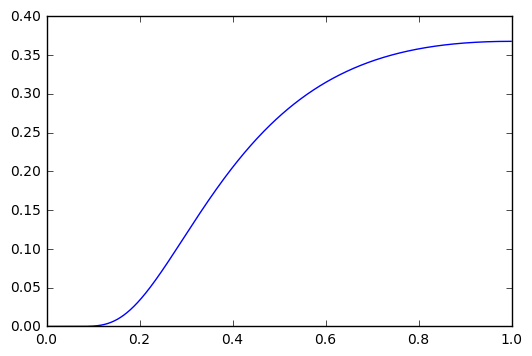

In [2]:
x = np.arange(0.001,1.0,.001) # can't start at sero because of singularity
y = np.exp(-1/x)/x
plt.plot(x, y)

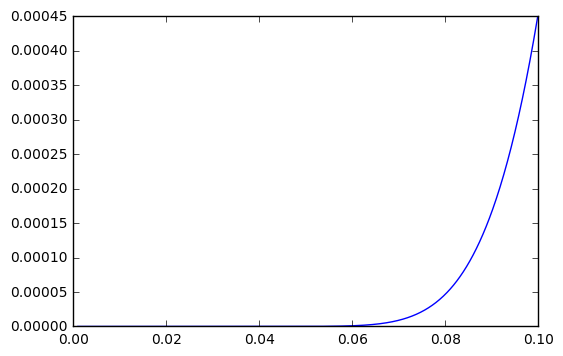

In [3]:
# Interesting stuff seems to happen before x = 0.1
x = np.arange(0.001,.1,.0001)
y = np.exp(-1/x)/x
plt.plot(x, y)

In the range [0,1] it looks like the function is strictly increasing. You can check by computing the derivatve (try it). So it is easy for figure that left and right Rieman sums will give lower and upper bounds.

But, maybe I don't have to work that hard as SciPy seems to give answers with error bounds. 

Recall our expansion looked like this:

$$\int_0^\epsilon \frac{e^{-1/t}}{t} \, dt \sim
 \left(
1 - \epsilon + 2!\epsilon^2 - 3!\epsilon^3 + \cdots + (-1)^n n! \epsilon^n + o(\epsilon^n)
\right)\epsilon e^{-1/\epsilon}.$$

We could move the exponential term over to the left to get
$$\frac{e^{1/\epsilon}}{\epsilon} \int_0^\epsilon \frac{e^{-1/t}}{t} \, dt \sim
1 - \epsilon + 2!\epsilon^2 - 3!\epsilon^3 + \cdots + (-1)^n n! \epsilon^n + o(\epsilon^n)
.$$

In [4]:
# Let's define a function that does a numerical integration

def lhs(eps):
    "returns the left hand side, which we are approximating"
    result = integrate.quad(lambda t: np.exp(-1/t)/t, 0, eps)
    return np.exp(1/eps)*result[0]/eps


In [5]:
# We can test out a few values 
lhs(1)

0.59634736232300445

In [6]:
# Note our first order expansion expects 1-.1 = .9
lhs(.1)

0.91563333939793012

In [7]:
# Note our first order expansion expects 1-.01 = .99
lhs(.01)

0.99019422867890561

In [8]:
lhs(.004)

0.99607749094750975

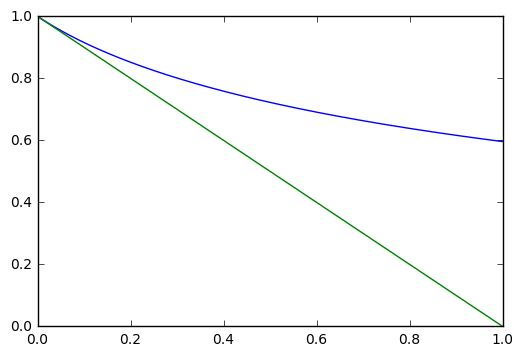

In [9]:
# Now lets compare the numerical integration with the 1st order approx
x = np.arange(0.005,1.0,.001) # can't start at sero because of singularity
y = np.zeros(len(x))
z = np.zeros(len(x))
for k in range(len(x)):
    y[k] = lhs(x[k])
    z[k] = 1 - x[k]

plt.plot(x, y,x,z)

What we see is near x=0, the fit is pretty good. Got the slope right.

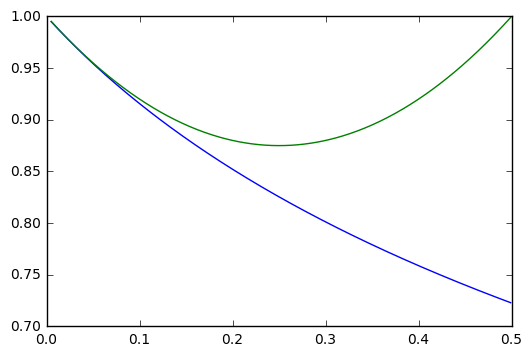

In [10]:
# Now lets compare the numerical integration with the 2nd order approx
x = np.arange(0.005,.5,.001) # can't start at sero because of singularity
y = np.zeros(len(x))
z = np.zeros(len(x))
for k in range(len(x)):
    y[k] = lhs(x[k])
    z[k] = 1 - x[k] + 2*x[k]*x[k]

plt.plot(x, y,x,z)

We see the fit is very good, even seem to get the curvature correct.


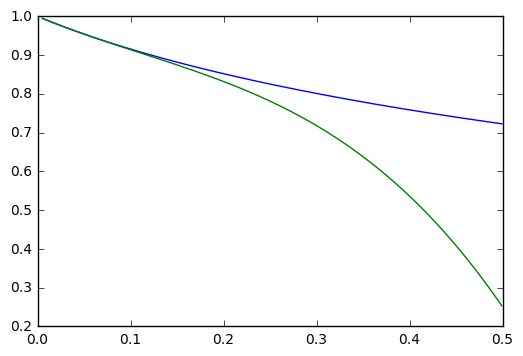

In [11]:
# Now lets compare the numerical integration with the 3rd order approx
x = np.arange(0.005,.5,.001) # can't start at sero because of singularity
y = np.zeros(len(x))
z = np.zeros(len(x))
for k in range(len(x)):
    y[k] = lhs(x[k])
    z[k] = 1 - x[k] + 2*x[k]*x[k] - 6*x[k]*x[k]*x[k]

plt.plot(x, y,x,z)

The fit looks even better, but now my intuition fails me. 
Let's try computing ratios.

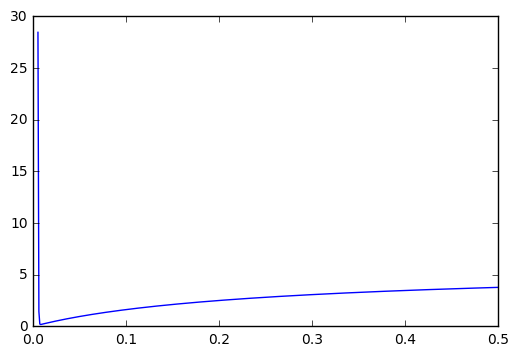

In [17]:
# Now lets compare the numerical integration with the 3rd order approx
x = np.arange(0.005,.5,.001) # can't start at sero because of singularity
y = np.zeros(len(x))
z = np.zeros(len(x))
for k in range(len(x)):
    y[k] = lhs(x[k])
    z[k] = 1 - x[k] + 2*x[k]*x[k]  - 6*x[k]*x[k]*x[k] # + 24*x[k]*x[k]*x[k]*x[k]

plt.plot(x, np.abs(y-z)/(x*x*x))

Except for the little blip at x=0, the error over x^3 grow slightly slower than linear in x. So the error is o(x^3) as expected.

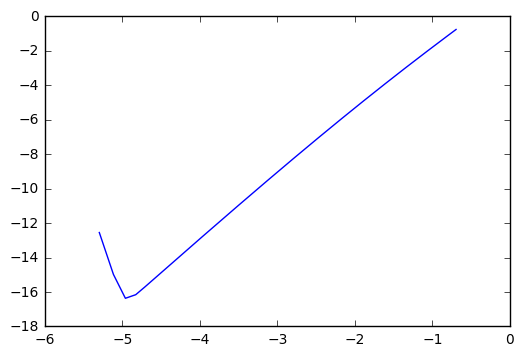

In [18]:
# slope of log-log plot tells us the order of accuracy
plt.plot(np.log(x), np.log(np.abs(y-z)))

In [19]:
16/4.5

3.5555555555555554

Slope is about 16/4.5 = 3.5, so a little smaller than 4. i.e better than 3rd order. o(x^3).

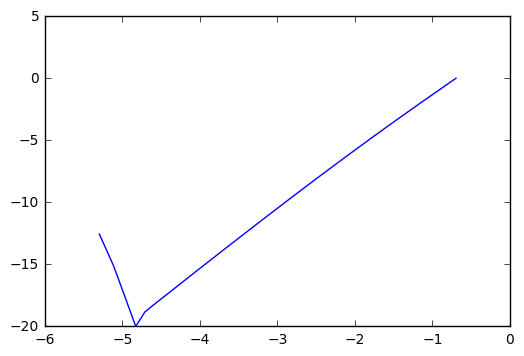

In [20]:
# Now lets compare the numerical integration with the 3rd order approx
x = np.arange(0.005,.5,.001) # can't start at sero because of singularity
y = np.zeros(len(x))
z = np.zeros(len(x))
for k in range(len(x)):
    y[k] = lhs(x[k])
    z[k] = 1 - x[k] + 2*x[k]*x[k]  - 6*x[k]*x[k]*x[k]  + 24*x[k]*x[k]*x[k]*x[k]

# log log plot tells us the order of accuracy
plt.plot(np.log(x), np.log(np.abs(y-z)))

Slope is 20/4 = 5 so the error is order 5, as expected.

We should be curious about this little blip. I am finding that the numerical integration fails for really small epsilon. (Another reason that an asymptotic expansion is useful -- it doesn't fail like that.)

## The second question -- how many terms do we need to take?


In some sense, that's the wrong question. The point is for the asymptotic expansion, you fix n terms in the expansion, and then take the limit as epsilon goes to zero. The error is then of order $o(\epsilon^n)$. So, you don't fix epsilon and then find an n that "works."

However, the book by Fowler gives a useful observation in this particular example. 

Going back to the integration by parts, the remainder term after getting $n$ terms is given by the integral
$$ R_n(\epsilon) = (-1)^n n! \int_0^\epsilon t^{n-1} e^{-1/t} \,dt.$$

Let's get a proper bound on this. Change variables with $t = \epsilon/x$ and so $dt = -\epsilon/x^2 dx$ with limits $x\in[1,\infty]$. This gives
$$ R_n(\epsilon) = (-1)^n n! \int_1^\infty (\epsilon/x)^{n-1} e^{-x/\epsilon} \,dx(\epsilon/x^2).$$ Pulling out the epsilons, we have

$$ R_n(\epsilon) = (-1)^n n! \epsilon^n \int_1^\infty (1/x)^{n+1} e^{-x/\epsilon} \,dx .$$

The integral on the right is bounded by $\int_1^\infty e^{-x/\epsilon} \,dx$ which integrates to $\epsilon e^{-1/\epsilon}$. Thus we obtain
$$ | R_n(\epsilon) | \leq n! \epsilon^{n+1} e^{-1/\epsilon}.$$
This is the proper order term that we wanted.

The claim in Fowler is that in fact $R_n(\epsilon) \sim (-1)^n n! \epsilon^{n+1} e^{-1/\epsilon}$ which seems pretty reasonable, given the integral above. Holding $\epsilon$ fixed (and small), we see that as $n$ increases, first the error $R_n(\epsilon)$ decreases with increasing $n$, because of the factor $\epsilon^n$. However, eventually the $n!$ factorial starts to dominate, so the error starts to grow.


Indeed, the ratio $R_n(\epsilon)/R_{n-1}(\epsilon) \sim n\epsilon$ indicates that for the first bit, when $n < 1/\epsilon$ the error decreases for increasing $n$, and thereafter, the error increases with $n$. So this explains why, given a particular $\epsilon$, a good choice for $n$ is about $1/\epsilon$. It gives us the smallest error in this particular asymptotic expansion.

#### Execise.
Check this. For epsilon = 1/10, compute what the error is for n=1...15, and verify that it is smallest with n = 10. (Is it?)

### To explore:
- what about those blips for small epsilon. Is Python messing up?
- can we use the error estimates from SciPy to verify what the problem is?
- can Matlab do better? Can Mathematica? Maple? Sage?
- can you write your own integrator that is better?
- note the function $f(x) = \exp(-1/x)/x$ is super smooth, and well behaved for $x>0$. Surely we can numerically integrate accurately!
- but note the function $f(z) = \exp(-1/z)/z$ has a really bad singularity in the complex plane at $z = 0$. (Essential singularity.) Do you think our integrators should care about this?